<h1><center><font size=12>H1B Data Mining Project</font></center></h1>

## __1. INTRODUCTION__

<font size=5>The H-1B is a visa in the United States under the Immigration and Nationality Act, section 101(a)(15)(H) which allows U.S. employers to employ foreign workers in specialty occupations.</font>


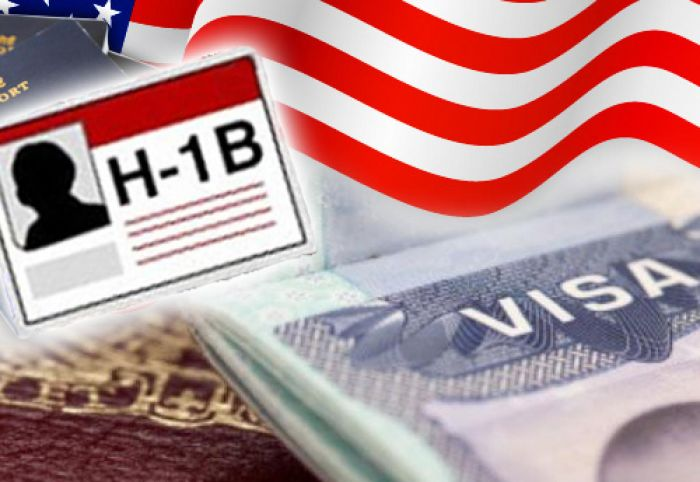


## __2. MOTIVATION AND GOAL__

<font size=5>i) a helper in university application process</font>
<br>
<br>
<font size=5>ii) a database to go to during job hunting</font>
<br>
<br>
<font size=5>iii) is H1B a lottery ? </font>

## __3. H1B APPLICATION DENSITY__

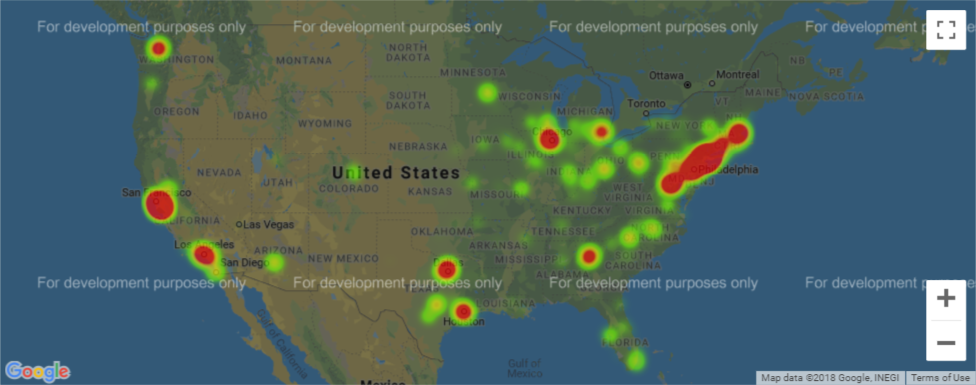
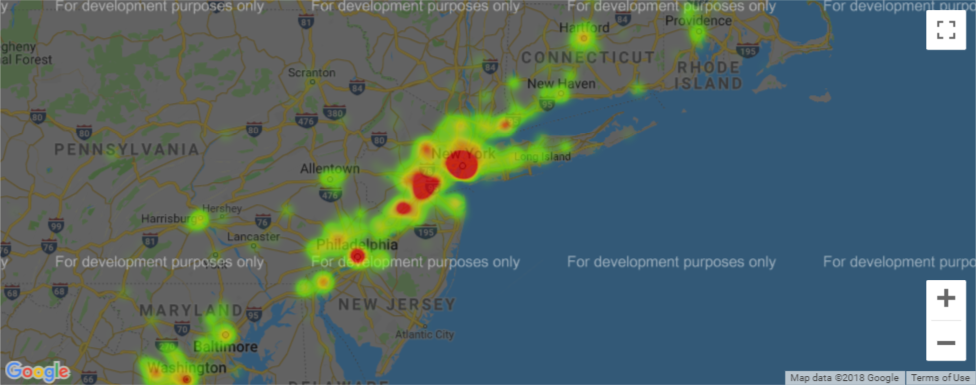

## __4. H1B APPLICATION PER STATE : ACADEMIA VS INDUSTRY__

<font size=5>Texas universities/colleges have filed the most number of H1B application. And California has the most industry jobs opportunities for foreigh works.</font>


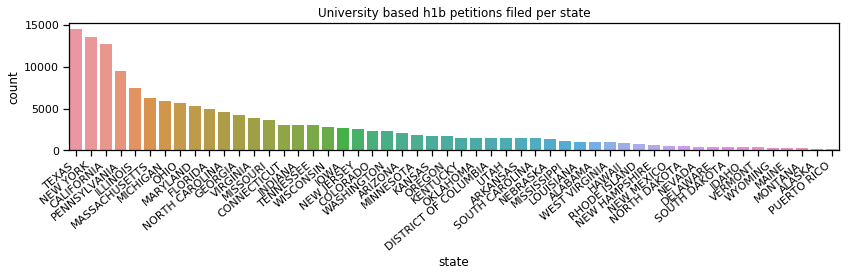
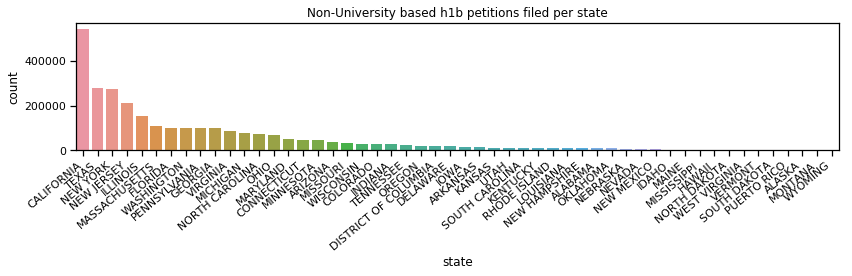

## __5. CS VS NON-CS JOBS H1B APPLICATION FROM 2011-2018__

<font size=5>CS related jobs increases faster than the nonCS jobs, but the trend seems to have a slow down at 2015.</font>

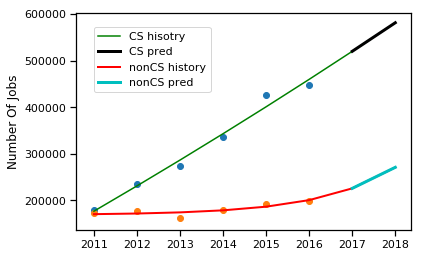

## __6. IMBALANCED DATA CLASSIFICATION__

<font size=5>The application results are very imbalanced. </font>

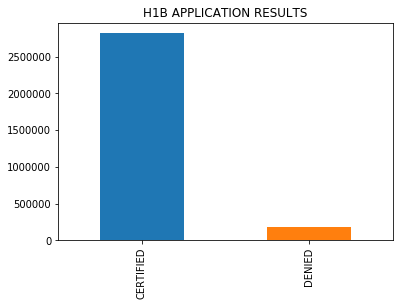
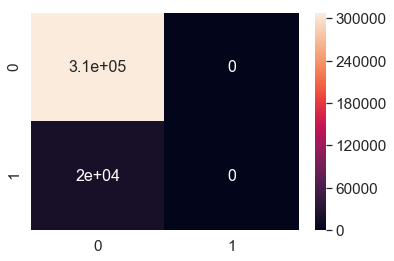

## __7. APPLIED SMOTE TECHNIQUE__

<font size=5>I have used SMOTE techniques,Synthetic Minority Over-sampling Technique, all classes are equally distributed which can be used for further machine learning </font>
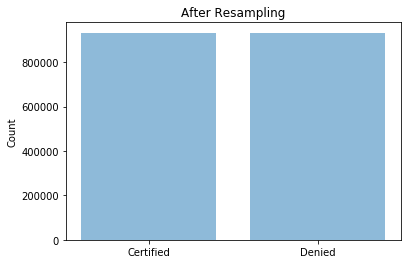
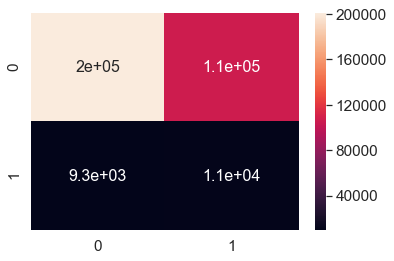

## __8. Next Week's Goal__

<font size=3>1. Add more features </font>
<br>
<font size=3>2. Make an interactive website for data visulization </font>
<br>
<font size=3>3. Apply statistics analysis such as mean salary in certain occupation </font>

In [1]:
import os
os.chdir("D:\stackoverflow data\h-1b-visa")

In [2]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import base
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data = pd.read_csv('h1b_kaggle.csv')
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
data['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan], dtype=object)

In [5]:
df = data.copy()

In [6]:
warnings.filterwarnings("ignore")

df.CASE_STATUS[df['CASE_STATUS']=='WITHDRAWN'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='REJECTED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

CERTIFIED    2818282
DENIED        184163
Name: CASE_STATUS, dtype: int64


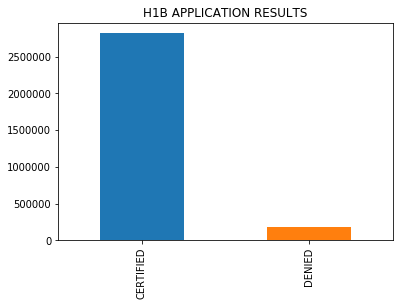

In [7]:
## Storing non null in df w.r.t. case status
df = df[df['CASE_STATUS'].notnull()]
print(df['CASE_STATUS'].value_counts())
df['CASE_STATUS'].value_counts().plot(kind='bar', title='H1B APPLICATION RESULTS')

Find out the number of NAN in the data and remove them

In [8]:
##check count of NAN
count_of_nan = len(df) - df.count()
print('the number of nan in each column is: ' , count_of_nan)

('the number of nan in each column is: ', Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             46
SOC_NAME               17721
JOB_TITLE                 30
FULL_TIME_POSITION         2
PREVAILING_WAGE           72
YEAR                       0
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64)


In [9]:
df = df[df['CASE_STATUS'].notnull()]
df = df[df['EMPLOYER_NAME'].notnull()]
df = df[df['SOC_NAME'].notnull()]
df = df[df['JOB_TITLE'].notnull()]
df = df[df['FULL_TIME_POSITION'].notnull()]
df = df[df['PREVAILING_WAGE'].notnull()]
# Dropping lat and lon columns
if 'lat' in df:
    df = df.drop('lat', axis = 1)
if 'lon' in df:
    df = df.drop('lon', axis = 1)
count_of_nan = len(df) - df.count()
print('the number of nan in each column is: ' , count_of_nan)

('the number of nan in each column is: ', Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64)


In [10]:
df['WHETHER_EMPLOYER_UNIVERSITY'] = np.nan

In [11]:
# to sepearte the data into academia job and not academia job
warnings.filterwarnings("ignore")
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.lower()
df.WHETHER_EMPLOYER_UNIVERSITY[df['EMPLOYER_NAME'].str.contains('university')] = 'university'
df.WHETHER_EMPLOYER_UNIVERSITY[df['EMPLOYER_NAME'].str.contains('college')] = 'university'
df['WHETHER_EMPLOYER_UNIVERSITY'] = df['WHETHER_EMPLOYER_UNIVERSITY'].replace(np.nan, 'not a university', regex=True)

In [12]:
df['WHETHER_CS'] = np.nan

In [13]:
# to sepearte the data into CS job and not CS job
warnings.filterwarnings("ignore")
df['SOC_NAME'] = df['SOC_NAME'].str.lower()
df.WHETHER_CS[df['SOC_NAME'].str.contains('computer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('software')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('data')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('programmer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('developer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('web')] = 'CS'
df['WHETHER_CS'] = df['WHETHER_CS'].replace(np.nan, 'not a CS job')

In [14]:
## Splitting city and state and capturing state in another variable
df['state'] = df.WORKSITE.str.split(',').str[-1].str.lstrip()
df = df[df.state != 'NA']

In [15]:
df1 = df.copy()
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
0,1,CERTIFIED,university of michigan,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,not a CS job,MICHIGAN
1,2,CERTIFIED,"goodman networks, inc.",chief executives,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",not a university,not a CS job,TEXAS
2,3,CERTIFIED,"ports america group, inc.",chief executives,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",not a university,not a CS job,NEW JERSEY
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",chief executives,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",not a university,not a CS job,COLORADO
4,5,DENIED,peabody investments corp.,chief executives,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",not a university,not a CS job,MISSOURI


In [16]:
for col in ['CASE_STATUS', 'WHETHER_CS', 'FULL_TIME_POSITION', 'YEAR', 'WHETHER_EMPLOYER_UNIVERSITY', 'state']:
    df1[col] = df1[col].astype('category')

In [17]:
df1.WHETHER_EMPLOYER_UNIVERSITY.unique()
df1.dtypes

Unnamed: 0                        int64
CASE_STATUS                    category
EMPLOYER_NAME                    object
SOC_NAME                         object
JOB_TITLE                        object
FULL_TIME_POSITION             category
PREVAILING_WAGE                 float64
YEAR                           category
WORKSITE                         object
WHETHER_EMPLOYER_UNIVERSITY    category
WHETHER_CS                     category
state                          category
dtype: object

In [18]:
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
0,1,CERTIFIED,university of michigan,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,not a CS job,MICHIGAN
1,2,CERTIFIED,"goodman networks, inc.",chief executives,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",not a university,not a CS job,TEXAS
2,3,CERTIFIED,"ports america group, inc.",chief executives,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",not a university,not a CS job,NEW JERSEY
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",chief executives,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",not a university,not a CS job,COLORADO
4,5,DENIED,peabody investments corp.,chief executives,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",not a university,not a CS job,MISSOURI


In [19]:
warnings.filterwarnings("ignore")
from sklearn import preprocessing
dimension = df1.shape
print(dimension[0])
nsamples = min(1000000, dimension[0])
simple_random_sampling = np.random.randint(0, dimension[0], nsamples)
df2 = df1.ix[simple_random_sampling]

class_mapping_casestatus = {'CERTIFIED' : 0, 'DENIED' : 1}
df2["CASE_STATUS"] = df2["CASE_STATUS"].map(class_mapping_casestatus)

class_mapping_university = {'university' : 0, 'not a university' : 1}
df2["WHETHER_EMPLOYER_UNIVERSITY"] = df2["WHETHER_EMPLOYER_UNIVERSITY"].map(class_mapping_university)

class_mapping_cs = {'CS' : 0, 'not a CS job' : 1}
df2["WHETHER_CS"] = df2["WHETHER_CS"].map(class_mapping_cs)

class_mapping_fulltime = {'Y' : 0, 'N' : 1}
df2["FULL_TIME_POSITION"] = df2["FULL_TIME_POSITION"].map(class_mapping_fulltime)

2981014


In [20]:
df2 = df2.dropna()

In [21]:
inputX = df2.copy()
inputX = inputX.drop(['CASE_STATUS', 'Unnamed: 0', \
                      'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', \
                      'WORKSITE', 'state', 'PREVAILING_WAGE', 'YEAR'], axis=1)
outputY = df2.CASE_STATUS
print(inputX.head())
print(outputY.head())

         FULL_TIME_POSITION  WHETHER_EMPLOYER_UNIVERSITY  WHETHER_CS
2933492                 0.0                          1.0         0.0
309482                  1.0                          1.0         0.0
449664                  1.0                          1.0         0.0
965129                  0.0                          1.0         0.0
1334964                 1.0                          1.0         1.0
2933492    0.0
309482     0.0
449664     0.0
965129     0.0
1334964    0.0
Name: CASE_STATUS, dtype: float64


In [22]:
inputX = inputX[inputX['FULL_TIME_POSITION'].notnull()]
inputX = inputX[inputX['WHETHER_EMPLOYER_UNIVERSITY'].notnull()]
inputX = inputX[inputX['WHETHER_CS'].notnull()]
outputY = outputY[outputY.notnull()]

In [23]:
from sklearn.model_selection import train_test_split
X_trainB, X_testB, y_trainB, y_testB = \
                train_test_split(inputX, outputY, test_size = 0.33, random_state = 42)

In [24]:
X_trainB_encode = X_trainB.astype('int')
y_trainB_encode = y_trainB.astype('int')

In [25]:
train_X = X_trainB_encode.as_matrix()
train_y = y_trainB_encode.as_matrix()

In [26]:
import xgboost
gbm  = xgboost.XGBClassifier(max_depth=3,
                             n_estimators=100, 
                             gamma = 0, 
                             learning_rate = 0.5)

In [27]:
fit_before = gbm.fit(train_X, train_y)

In [28]:
X_test_encode = X_testB.astype('int')
test_X = X_test_encode.as_matrix()
pred_y = gbm.predict(test_X)

In [29]:
y_test_encode = y_testB.astype('int')
test_y = y_test_encode.as_matrix()
np.unique(test_y)

array([0, 1])

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y, pred_y))

[[307730      0]
 [ 19905      0]]


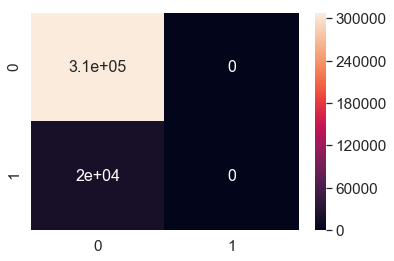

In [236]:
#plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(confusion_matrix(test_y, pred_y), range(2), range(2))
sns.set(font_scale = 1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size

SMOTE (Synthetic Minority Oversampling TEchnique)

In [31]:
X = inputX
y = outputY

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio = 'auto')
X_sm, y_sm = smote.fit_sample(X, y)

In [33]:
unique, counts = np.unique(y_sm, return_counts=True)

print np.asarray((unique, counts)).T

[[  0.00000000e+00   9.32922000e+05]
 [  1.00000000e+00   9.32922000e+05]]


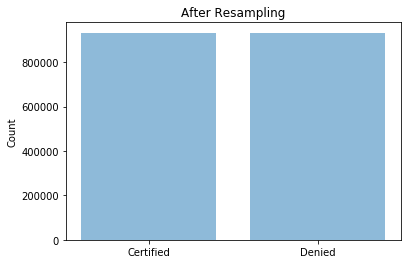

In [34]:
objects = ('Certified', 'Denied')
y_pos = np.arange(len(objects))
performance = [9.32575000e+05, 9.32575000e+05]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('After Resampling')
 
plt.show()

In [35]:
X_sm

array([[ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.],
       [ 0.,  1.,  1.],
       [ 0.,  1.,  1.]])

In [36]:
X_trainA, X_testA, y_trainA, y_testA = \
                train_test_split(X_sm, y_sm, test_size = 0.33, random_state = 42)

In [37]:
X_trainA_encode = X_trainA.astype('int')
y_trainA_encode = y_trainA.astype('int')

In [38]:
train_X1 = X_trainA_encode
train_y1 = y_trainA_encode

In [39]:
gbmA  = xgboost.XGBClassifier(max_depth = 3,
                              n_estimators= 100, 
                              gamma = 0, 
                              learning_rate = 0.25)
fit_after = gbmA.fit(train_X1, train_y1)

In [40]:
pred_y_after = gbmA.predict(test_X)

In [41]:
print(confusion_matrix(test_y, pred_y_after))

[[201123 106607]
 [  9310  10595]]


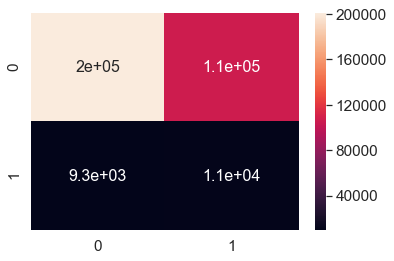

In [42]:
#plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(confusion_matrix(test_y, pred_y_after), range(2), range(2))
sns.set(font_scale = 1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size

In [43]:
outputY_salary = df2.PREVAILING_WAGE

In [44]:
xgb_reg = xgboost.XGBRegressor(n_estimators=100, 
                               learning_rate=0.08, 
                               gamma=0, 
                               subsample=0.75,
                               colsample_bytree=1, 
                               max_depth=15)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = \
                train_test_split(inputX, outputY_salary, test_size=0.33, random_state=42)
fit_reg = xgb_reg.fit(X_train_reg, y_train_reg)

In [48]:
y_pred_reg = xgb_reg.predict(X_test_reg)
print(y_test_reg[:10])
print(y_pred_reg[:10])

609055      43110.0
898063     109762.0
1321016     72779.0
2977613     38376.0
742485      85322.0
1279343    112424.0
146440      61797.0
109031      55390.0
1072133    116438.4
166960      77147.0
Name: PREVAILING_WAGE, dtype: float64
[  77156.0546875  145854.28125    145854.28125     77156.0546875
  145854.28125    145854.28125     75657.6484375   75657.6484375
   77156.0546875  145854.28125  ]


In [46]:
from sklearn.metrics import r2_score
y_true = y_test_reg
y_pred = y_pred_reg
r2_score(y_true, y_pred)  

0.00013721803669330956